In [152]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [153]:
os.getenv('PUIDATA')
#Returns the string associated with PUIDATA environmental variable

'/home/cusp/jc7344/PUIdata'

In [154]:
#!curl -O "https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv"

In [155]:
os.system("curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv")
os.system("mv rows.csv " + os.getenv("PUIDATA"))
#Moves downloaded data to PUIDATA 

0

In [156]:
nrg = gp.GeoDataFrame.from_csv(os.getenv('PUIDATA') + '/' + 'rows.csv')

In [157]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [158]:
nrg.columns

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [159]:
!curl -O "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  43.1M      0 --:--:-- --:--:-- --:--:-- 44.0M


In [160]:
os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
os.system("mv mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))

0

In [161]:
os.system("unzip " + os.getenv('PUIDATA') + '/' + "mn_mappluto_16v1.zip")

256

In [162]:
bsize = gp.GeoDataFrame.from_file('MNMapPLUTO.shp')

In [163]:
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [164]:
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6d5342160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc6d4a06e80>]], dtype=object)

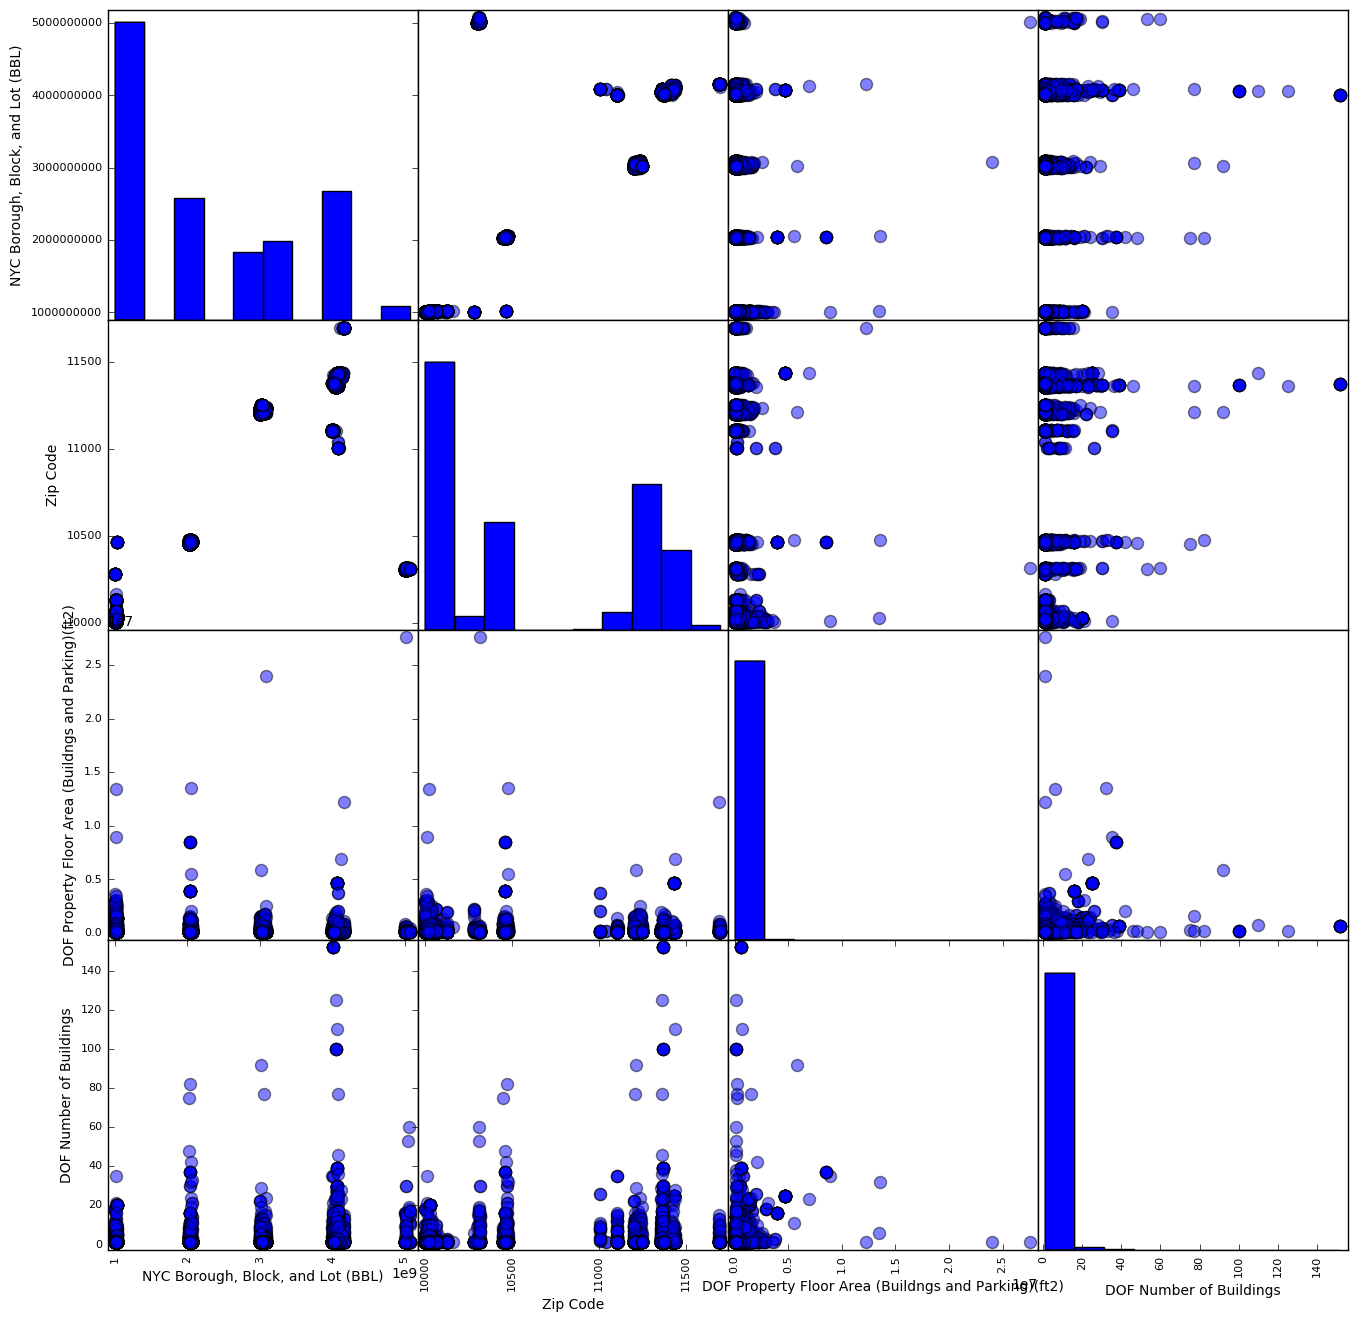

In [165]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [166]:
nrg.drop(['Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'], axis = 1, inplace = True)

In [167]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,1.000410e+09,NaN,918919
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000


In [168]:
bsize.drop(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'Version', 'XCoord', 'YCoord',
       'YearAlter1', 'YearAlter2', 'YearBuilt', 'ZMCode', 'ZipCode',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap',
       'geometry'], axis = 1, inplace = True)

In [169]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print("True entries %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

indx2 = (np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
print("True entries %d"%sum(indx))
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx2] = float('NaN')

indx3 = (np.vectorize(canconvert)(nrg['NYC Borough, Block, and Lot (BBL)']))
print("True entries %d"%sum(indx))
nrg['NYC Borough, Block, and Lot (BBL)'][~indx3] = float('NaN')

True entries 15513
True entries 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


True entries 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [170]:
nrg2['Site EUI(kBtu/ft2)'] = nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nrg2['Reported Property Floor Area (Building(s)) (ft²)'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)
nrg2['NYC Borough, Block, and Lot (BBL)'] = nrg['NYC Borough, Block, and Lot (BBL)'].convert_objects(convert_numeric=True)
print(np.dtype(nrg2['Site EUI(kBtu/ft2)']))
print(np.dtype(nrg2['Reported Property Floor Area (Building(s)) (ft²)']))

float64
float64


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [191]:
bsize = bsize[bsize['UnitsTotal']>10]
bsize.head()

,BBL,UnitsRes,UnitsTotal
0,1.015450e+09,16,18
1,1.007238e+09,50,50
3,1.013850e+09,29,32
4,1.011970e+09,26,26
8,1.022240e+09,30,30


In [192]:
nrg = nrg.rename(columns = {'NYC Borough, Block, and Lot (BBL)' : 'BBL'})
nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,1.000410e+09,NaN,918919
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000


In [193]:
print(np.dtype(nrg2['Site EUI(kBtu/ft2)']))

float64


In [194]:
print(np.dtype(nrg2['Reported Property Floor Area (Building(s)) (ft²)']))

float64


In [195]:
nrg2['EnergyTotal'] = nrg2['Site EUI(kBtu/ft2)'] * nrg2['Reported Property Floor Area (Building(s)) (ft²)']

In [197]:
merged = pd.merge(nrg2, bsize, on='BBL')
merged.head()
print(len(merged))
merged = merged.dropna()
print(len(merged))

5201
4266


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6c85df2b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc6c289b860>]], dtype=object)

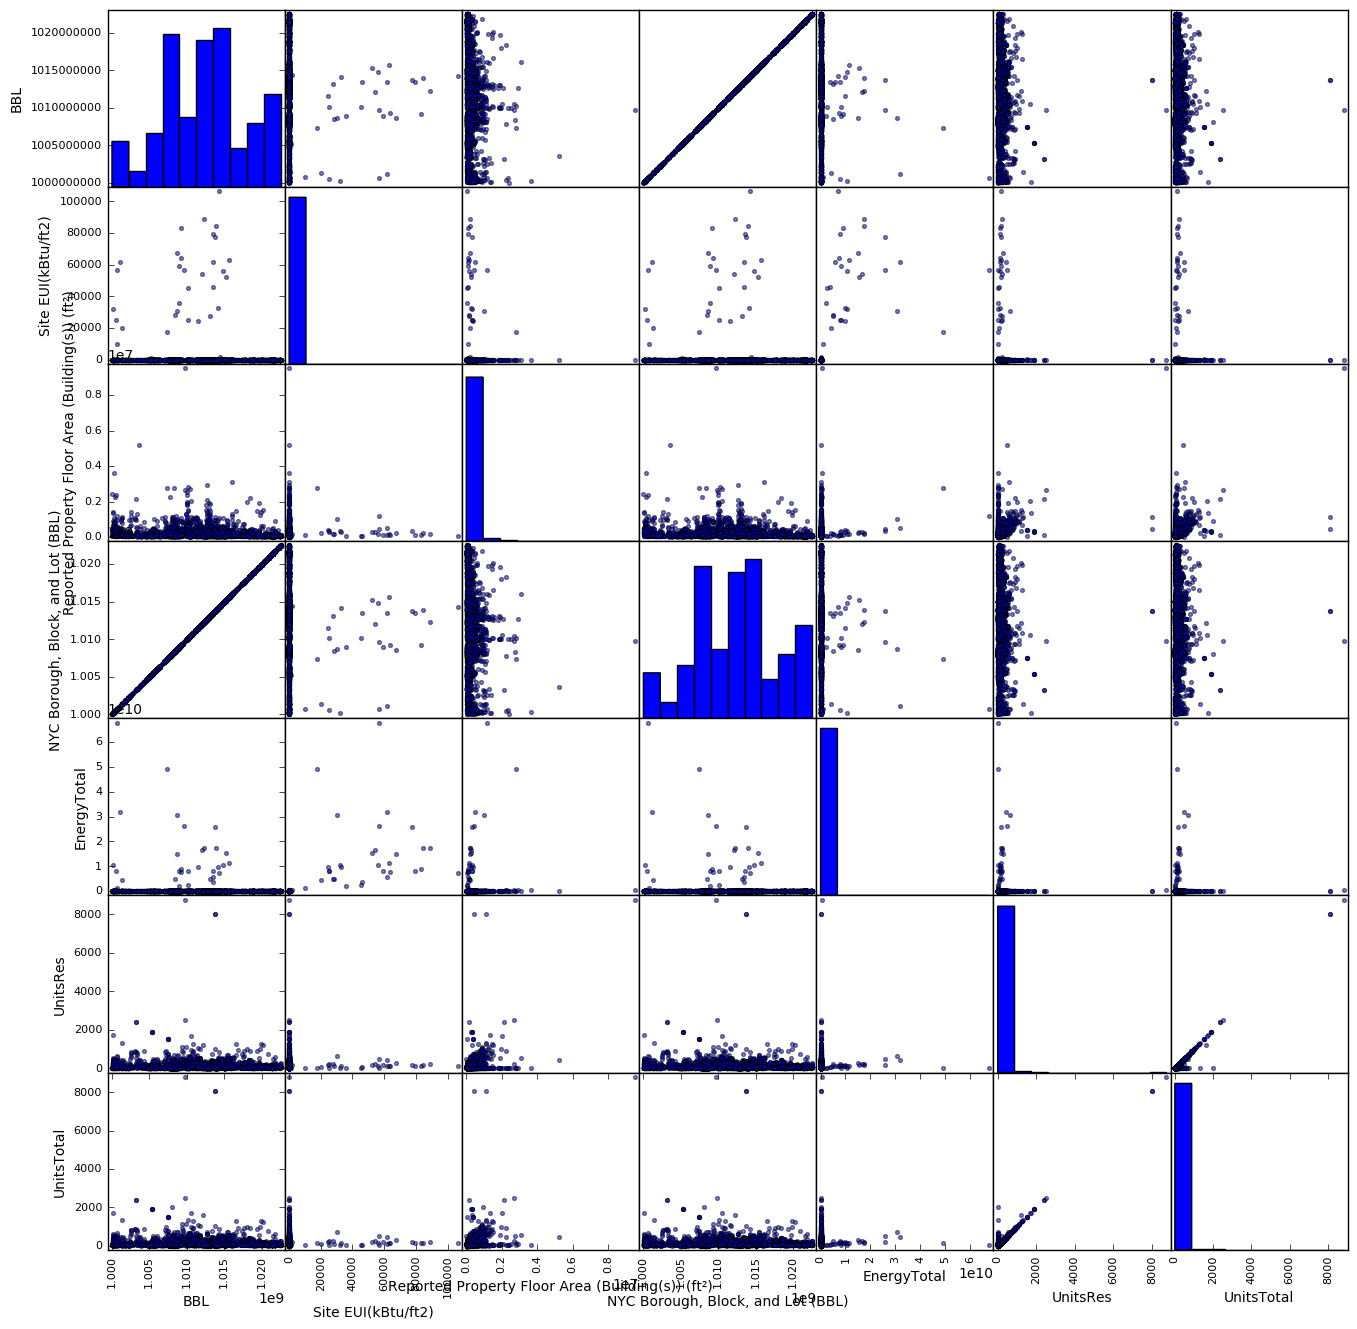

In [198]:
scatter_matrix (merged, s=30, figsize=(16, 16))

In [199]:
np.dtype(merged['UnitsTotal'])

dtype('int64')

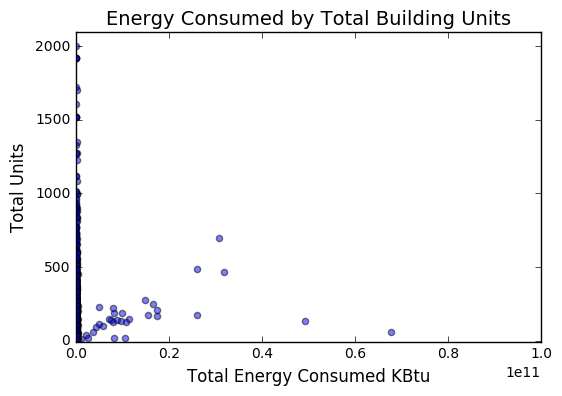

In [200]:
pl.scatter(x=merged['EnergyTotal'], y=merged['UnitsTotal'],alpha=0.5)
pl.axis([-5, 1e11, -5, 2100])
pl.title('Energy Consumed by Total Building Units', fontsize=14)
pl.xlabel('Total Energy Consumed KBtu', fontsize=12)
pl.ylabel('Total Units', fontsize=12)
pl.show()

This plot shows the total energy consumption (in KBtu) by all units

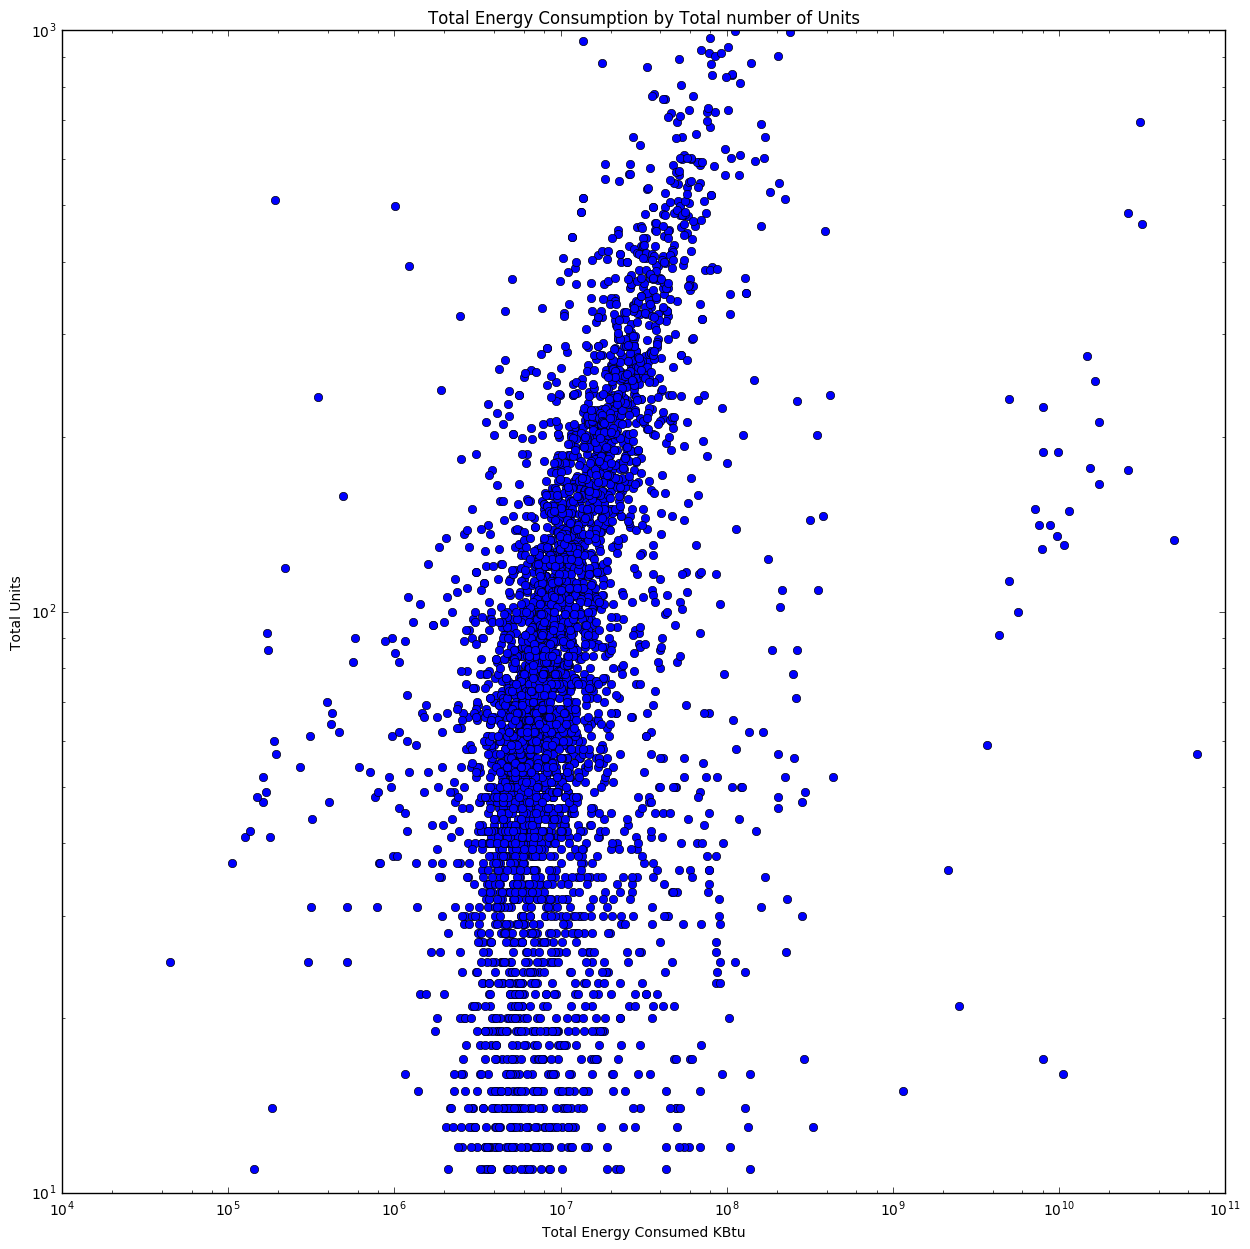

In [228]:
plt.figure(figsize=(15,15))
plt.loglog(merged['EnergyTotal'], merged['UnitsTotal'], 'o')
plt.xlim([10**4, 10**11])
plt.xlabel('Total Energy Consumed KBtu')
plt.ylabel("Total Units")
plt.title("Total Energy Consumption by Total number of Units")

This plot is a zoomed-in version and shows the total energy consumption by all units.

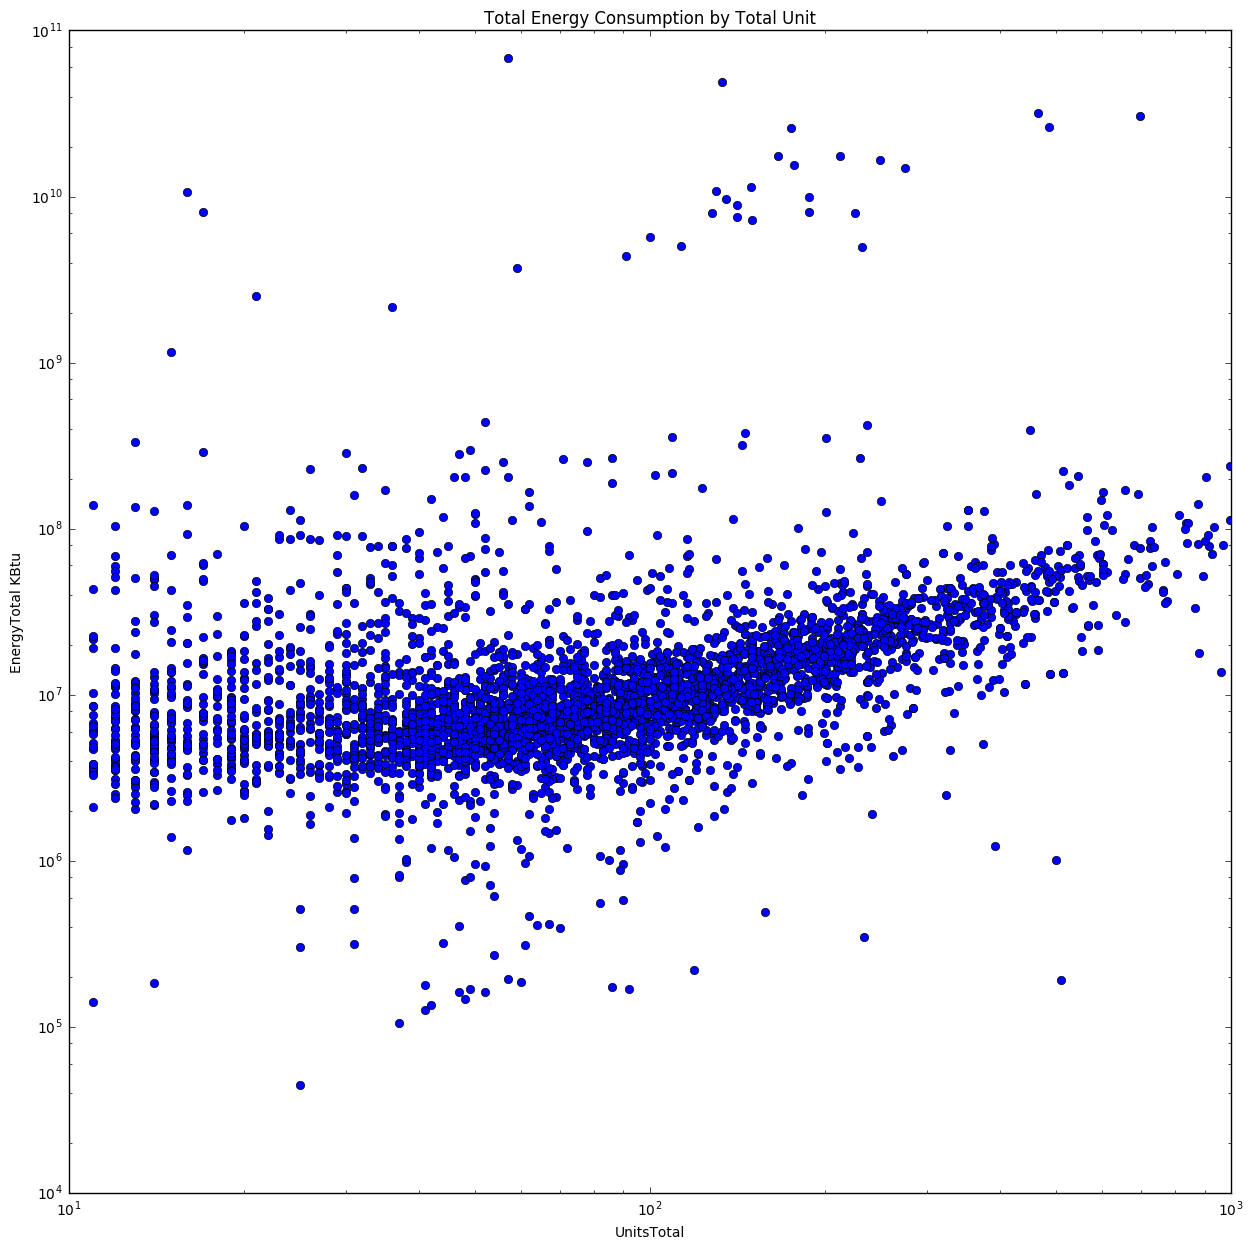

In [229]:
plt.figure(figsize=(15,15))
plt.loglog(merged['UnitsTotal'], merged['EnergyTotal'], 'o')
plt.ylim([10**4, 10**11])
plt.ylabel("EnergyTotal KBtu")
plt.xlabel("UnitsTotal")
plt.title("Total Energy Consumption by Total Unit")

In [203]:
merged = merged[merged.UnitsTotal<1000]
print(len(merged))

4237


In [204]:
import statsmodels.api as sm
bsize_1 = np.log10(merged['UnitsTotal'])
nrg_1 = sm.add_constant(np.log10(merged['EnergyTotal KBtu']))

In [205]:
linmodel_1 = sm.OLS(bsize_1, nrg_1, missing='drop')
results_1 = linmodel_1.fit()

[ 2.08517416  2.08931687  1.97535623 ...,  2.09071665  2.02077764
  2.02577256]


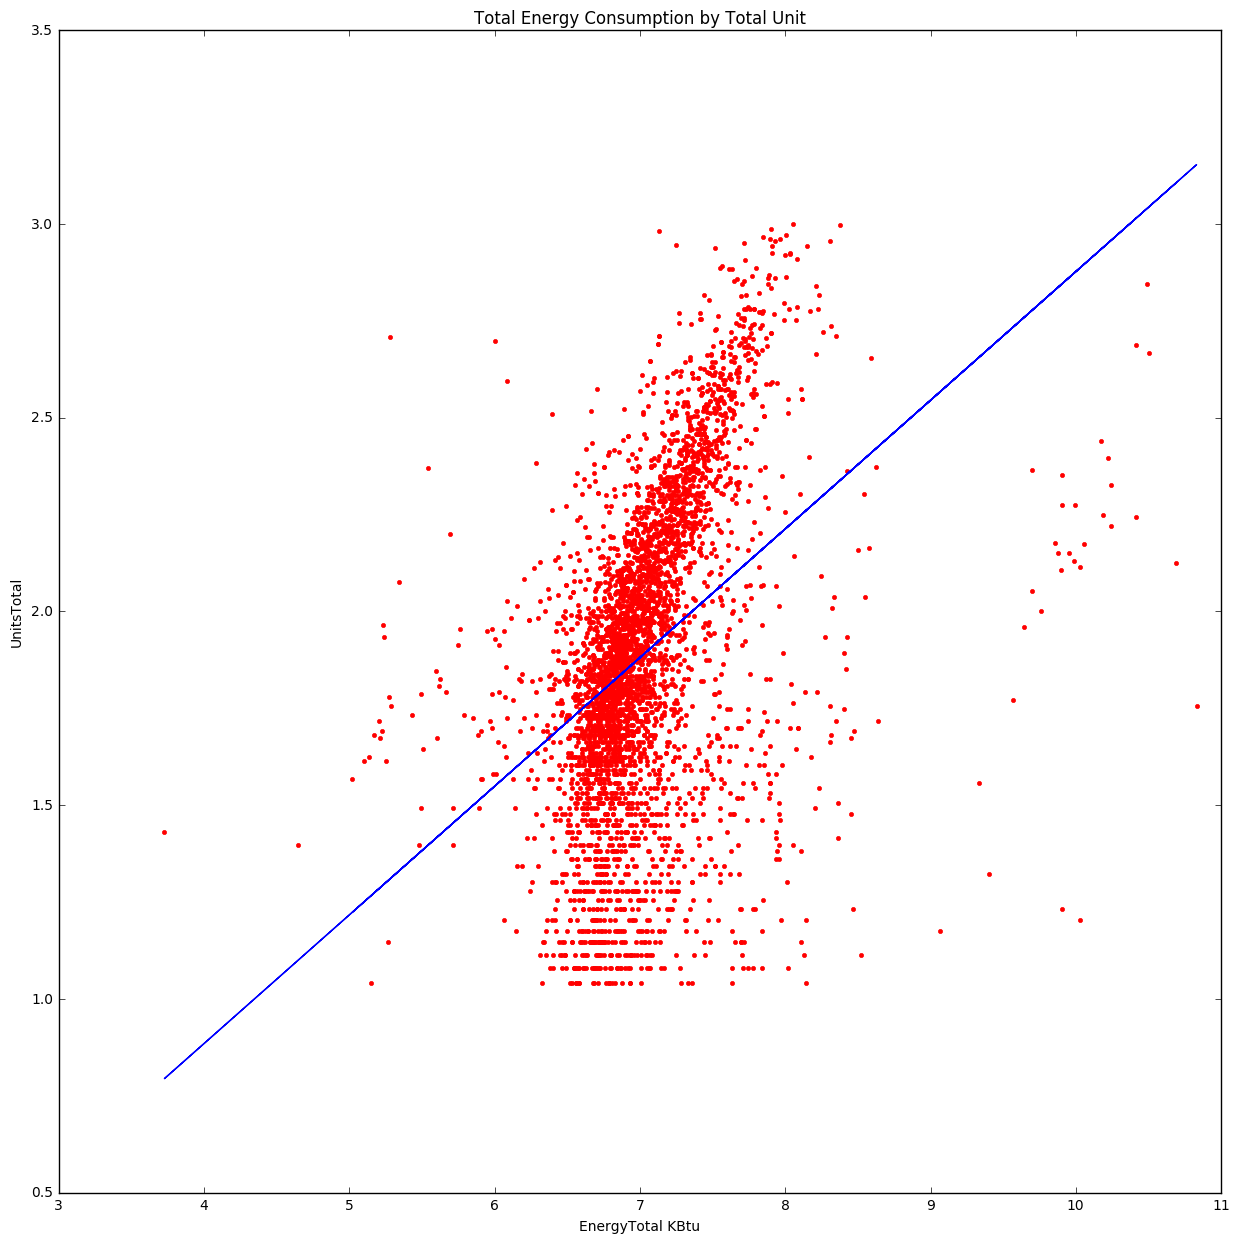

In [230]:
plt.figure(figsize=(15,15))
y = np.log10(merged['UnitsTotal'])
X = sm.add_constant(np.log10(merged['EnergyTotal']))
linmodel_ue = sm.OLS(y, X).fit()
print(linmodel_ue.predict(X))
pl.plot(np.log10(merged['EnergyTotal']), np.log10(merged['UnitsTotal']), 'r.')
pl.plot(np.log10(merged['EnergyTotal']), linmodel_ue.predict(X), '-')
plt.xlabel("EnergyTotal KBtu")
plt.ylabel("UnitsTotal")
plt.title("Total Energy Consumption by Total Unit")


In the plot above, we fit a line through the total energy consumption data. 

In [212]:
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     848.0
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.23e-170
Time:                        10:16:22   Log-Likelihood:                -1654.9
No. Observations:                4237   AIC:                             3314.
Df Residuals:                    4235   BIC:                             3326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -0.4441      0.080     -5.526      

In [214]:
#fit line for energy as a function of units
bsize2 = sm.add_constant(np.log10(merged['UnitsTotal']))
nrg3 = np.log10(merged['EnergyTotal'])

In [215]:
linmodel_2 = sm.OLS(nrg3, bsize2, missing='drop')
results_2 = linmodel_2.fit()

[ 6.95953147  6.7746521   6.7746521  ...,  6.67209787  6.88058932
  6.65704371]


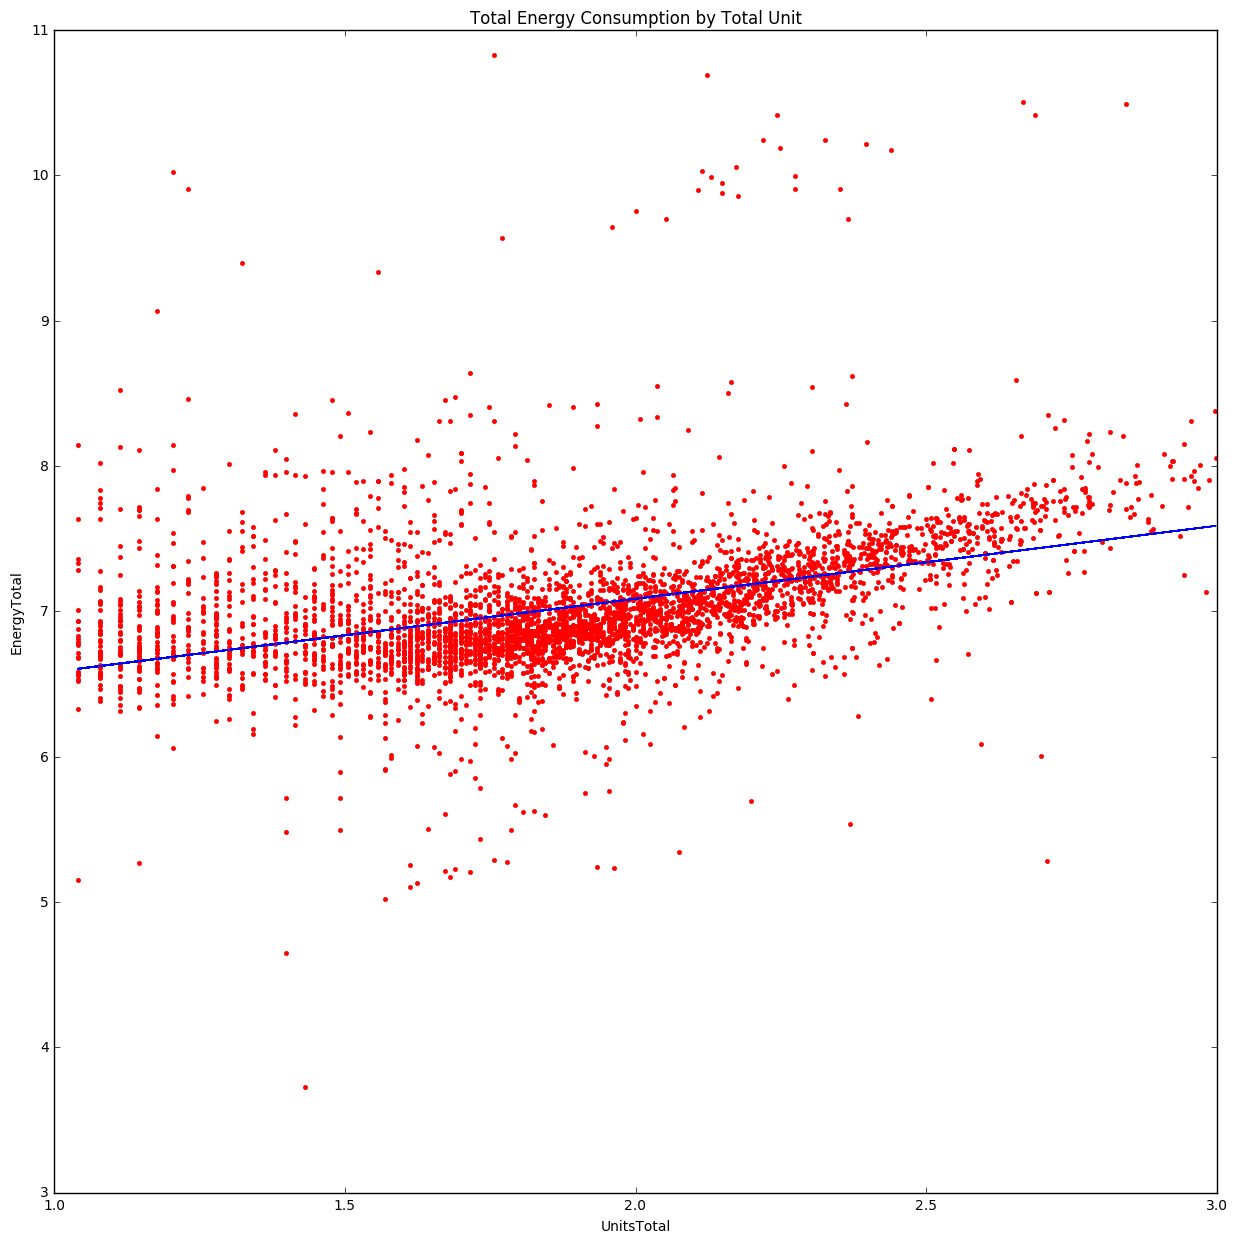

In [231]:
plt.figure(figsize=(15,15))
y = np.log10(merged['EnergyTotal'])
X = sm.add_constant(np.log10(merged['UnitsTotal']))
linmodel_eu = sm.OLS(y, X).fit()
print(linmodel_eu.predict(X))
pl.plot(np.log10(merged['UnitsTotal']), np.log10(merged['EnergyTotal']), 'r.')
pl.plot(np.log10(merged['UnitsTotal']), linmodel_eu.predict(X), '-')
plt.ylabel("EnergyTotal")
plt.xlabel("UnitsTotal")
plt.title("Total Energy Consumption by Total Unit")

The plot above fits a line for energy consumption as function of units 

In [217]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:            EnergyTotal   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     848.0
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.23e-170
Time:                        10:30:21   Log-Likelihood:                -2532.2
No. Observations:                4237   AIC:                             5068.
Df Residuals:                    4235   BIC:                             5081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.0812      0.033    182.547      0.0

In [218]:
#from chi sq formula we use the following: sum of (model - observation)**2 / error**2
#energy as a function of units (energy = y and units = x)

eu_obs = []
for elem in np.log10(merged['UnitsTotal'].dropna()):
    eu_obs.append(elem)
eu_pred = linmodel_eu.predict(X)
print(type(eu_pred))
print(type(eu_obs))
eu_error = (np.log10(np.sqrt(linmodel_eu.predict(X))))**2

<class 'numpy.ndarray'>
<class 'list'>


In [219]:
eu_pred_obs = [(eu_pred - eu_obs)**2 for eu_obs, eu_pred in zip(eu_pred, eu_obs)]

In [220]:
eu_pred_obs_sum = sum(eu_pred_obs)
eu_error_sum = sum(eu_error)
eu_chisq_2 = eu_pred_obs_sum / eu_error_sum
print(eu_chisq_2)

147.562663037


In [221]:
#sum of (model - observation)**2 / error**2
#units as a function of energy where units = y and energy = x
y = np.log10(merged['UnitsTotal'])
ue_X = sm.add_constant(np.log10(merged['EnergyTotal']))

ue_obs = []
for elem in np.log10(merged['EnergyTotal'].dropna()):
    ue_obs.append(elem)
ue_pred = linmodel_ue.predict(ue_X)
print(type(ue_pred))
print(type(ue_obs))
ue_error = (np.log10(linmodel_ue.predict(ue_X)))**2

<class 'numpy.ndarray'>
<class 'list'>


In [222]:
ue_pred_obs = [(ue_pred - ue_obs)**2 for ue_obs, ue_pred in zip(ue_pred, ue_obs)]

In [223]:
ue_pred_obs_sum = sum(ue_pred_obs)
ue_error_sum = sum(ue_error)
ue_chisq_2 = ue_pred_obs_sum / ue_error_sum
print(ue_chisq_2)

344.670173849


From this moment on  x = bsize = eu_obs, where the last variable is a list of all the observed values of units in log form

In [224]:
#From this cell and on I received substantial instructions from Kristi Korsberg.
#create array of y values where y = energy consumed
eu_results = []
for elem in np.log10(merged['EnergyTotal']):
    eu_results.append(elem)

In [225]:
eu_obs = []
for elem in np.log10(merged['UnitsTotal'].dropna()):
    eu_obs.append(elem)

In [226]:
#Kristi informed me that she found helpful poly fit-related informtion 
#on : http://stackoverflow.com/questions/18767523/fitting-data-with-numpy
#coefs = poly.polyfit(eu_obs, eu_results, 2)
#ffit = poly.polyval(eu_obs, coefs)
xp = np.linspace(1, 3, 100)
coefs = np.polyfit(eu_obs, eu_results, 2)
fit = np.poly1d(coefs)

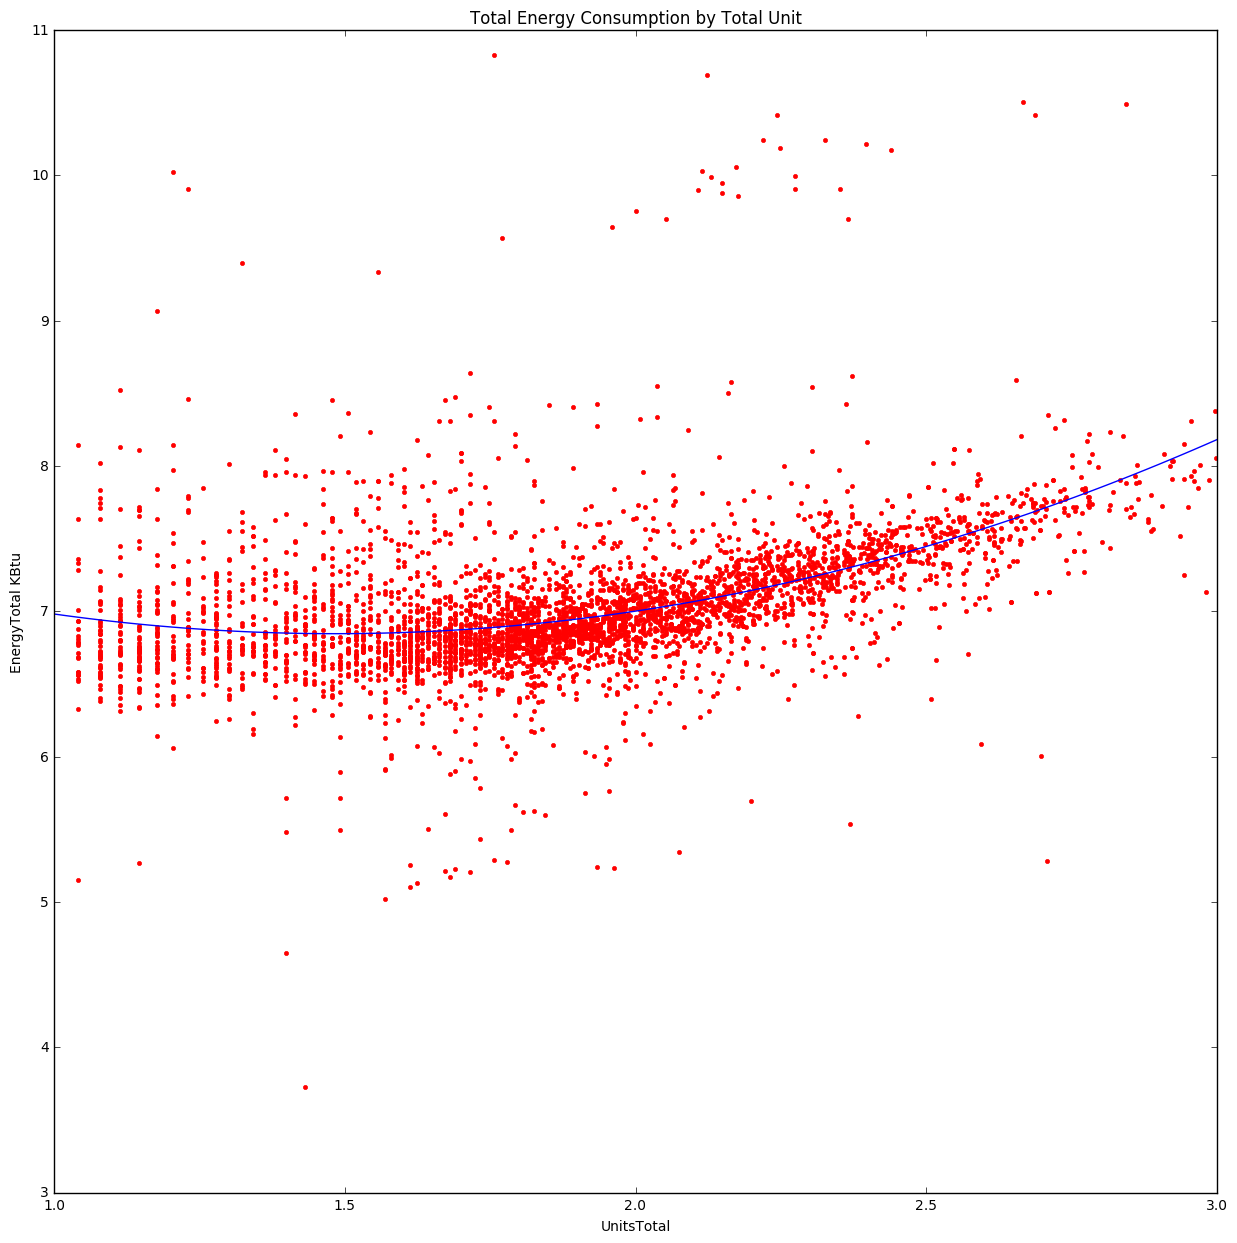

In [232]:
plt.figure(figsize=(15,15))
pl.plot(np.log10(merged['UnitsTotal']), np.log10(merged['EnergyTotal']), 'r.')
plt.plot(xp, fit(xp))
plt.ylabel("EnergyTotal KBtu")
plt.xlabel("UnitsTotal")
plt.title("Total Energy Consumption by Total Unit")